### Задание №1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [6]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head

<bound method NDFrame.head of          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0    1.287702 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1   -0.336384 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2   -0.403253  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3    0.388230 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4   -0.325282 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   
..        ...       ...       ...       ...       ...       ...       ...   
399 -0.387850 -0.500320 -0.352167 -0.278089 -0.310348 -0.677264  0.834884   
400 -0.373414  0.364589 -0.584520 -0.278089 -0.786706 -0.649038 -0.946216   
401 -0.405470  2.959318 -1.303361 -0.278089 -1.033391  0.450354 -1.389703   
402  0.851897 -0.500320  1.033237 -0.278089  1.561057  0.441886  0.931450   
403 -0.381356 -0.500320 -0.352167 -0.278089 -0.310348  0.125758  0.602411   

          DIS       RAD       TAX   PTRATIO  

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


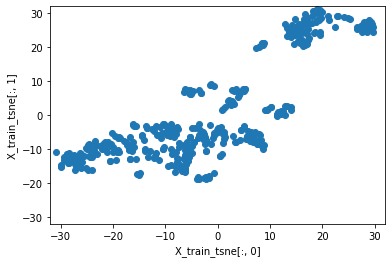

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.xlabel('X_train_tsne[:, 0]')
plt.ylabel('X_train_tsne[:, 1]')
plt.axis([-32, 32, -32, 32])
plt.show()

### Задание №2

In [42]:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_clast_3 = kmeans_3.fit_predict(X_train_scaled)

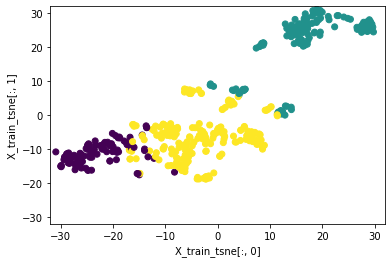

In [44]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_clast_3)
plt.xlabel('X_train_tsne[:, 0]')
plt.ylabel('X_train_tsne[:, 1]')
plt.axis([-32, 32, -32, 32])
plt.show()

In [69]:
c1 = (y_train['price'][labels_clast_3 == 0].mean(), X_train['CRIM'][labels_clast_3 == 0].mean())
c2 = (y_train['price'][labels_clast_3 == 1].mean(), X_train['CRIM'][labels_clast_3 == 1].mean())
c3 = (y_train['price'][labels_clast_3 == 2].mean(), X_train['CRIM'][labels_clast_3 == 2].mean())
[c1,c2,c3]

[(27.788372093023252, 0.07356558139534886),
 (16.165354330708666, 10.797028425196853),
 (24.958115183246072, 0.42166020942408367)]

In [75]:
X_test_tsne = tsne.fit_transform(X_test_scaled)
labels_clast_3_test = kmeans_3.fit_predict(X_test_scaled)

C:\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


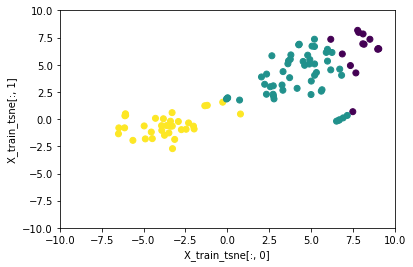

In [76]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_clast_3_test)
plt.xlabel('X_train_tsne[:, 0]')
plt.ylabel('X_train_tsne[:, 1]')
plt.axis([-10, 10, -10, 10])
plt.show()

In [77]:
c1t = (y_test['price'][labels_clast_3_test == 0].mean(), X_test['CRIM'][labels_clast_3_test == 0].mean())
c2t = (y_test['price'][labels_clast_3_test == 1].mean(), X_test['CRIM'][labels_clast_3_test == 1].mean())
c3t = (y_test['price'][labels_clast_3_test == 2].mean(), X_test['CRIM'][labels_clast_3_test == 2].mean())
[c1t,c2t,c3t]

[(33.871428571428574, 0.08618571428571427),
 (21.552830188679245, 0.25200716981132076),
 (16.437142857142856, 10.165531142857143)]

Данные схожи в тренировочной и тестовой выборке, но кластеры поменялись местами, по индексу.